--1--  Binarization

In [1]:
!mkdir -p dibco2018
!cd dibco2018

In [2]:
! wget https://vc.ee.duth.gr/h-dibco2018/benchmark/dibco2018_Dataset.zip
! wget https://vc.ee.duth.gr/h-dibco2018/benchmark/dibco2018-GT.zip
! wget https://vc.ee.duth.gr/h-dibco2018/benchmark/dibco_metrics.zip
! wget https://vc.ee.duth.gr/h-dibco2018/benchmark/BinEvalWeights.zip



--2026-01-31 03:07:26--  https://vc.ee.duth.gr/h-dibco2018/benchmark/dibco2018_Dataset.zip
Resolving vc.ee.duth.gr (vc.ee.duth.gr)... 83.212.140.54
Connecting to vc.ee.duth.gr (vc.ee.duth.gr)|83.212.140.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22311122 (21M) [application/zip]
Saving to: ‘dibco2018_Dataset.zip’

dibco2018_Dataset.z 100%[===================>]  21.28M  8.02MB/s    in 2.7s    

2026-01-31 03:07:32 (8.02 MB/s) - ‘dibco2018_Dataset.zip’ saved [22311122/22311122]

--2026-01-31 03:07:32--  https://vc.ee.duth.gr/h-dibco2018/benchmark/dibco2018-GT.zip
Resolving vc.ee.duth.gr (vc.ee.duth.gr)... 83.212.140.54
Connecting to vc.ee.duth.gr (vc.ee.duth.gr)|83.212.140.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3102047 (3.0M) [application/zip]
Saving to: ‘dibco2018-GT.zip’

dibco2018-GT.zip    100%[===================>]   2.96M  3.01MB/s    in 1.0s    

2026-01-31 03:07:33 (3.01 MB/s) - ‘dibco2018-GT.zip’ saved [31020

In [3]:
! unzip dibco2018_Dataset.zip
! unzip dibco2018-GT.zip
! unzip dibco_metrics.zip

Archive:  dibco2018_Dataset.zip
   creating: dataset/
  inflating: dataset/1.bmp           
  inflating: dataset/10.bmp          
  inflating: dataset/2.bmp           
  inflating: dataset/3.bmp           
  inflating: dataset/4.bmp           
  inflating: dataset/5.bmp           
  inflating: dataset/6.bmp           
  inflating: dataset/7.bmp           
  inflating: dataset/8.bmp           
  inflating: dataset/9.bmp           
Archive:  dibco2018-GT.zip
   creating: gt/
  inflating: gt/10_gt.bmp            
  inflating: gt/1_gt.bmp             
  inflating: gt/2_gt.bmp             
  inflating: gt/3_gt.bmp             
  inflating: gt/4_gt.bmp             
  inflating: gt/5_gt.bmp             
  inflating: gt/6_gt.bmp             
  inflating: gt/7_gt.bmp             
  inflating: gt/8_gt.bmp             
  inflating: gt/9_gt.bmp             
   creating: weights/
  inflating: weights/10_gt_PWeights.dat  
  inflating: weights/10_gt_RWeights.dat  
  inflating: weights/1_gt_PWeights.d

In [4]:
!ls

BinEvalWeights.zip  dibco2018_Dataset.zip  dibco_metrics.zip  weights
dataset		    dibco2018-GT.zip	   gt
dibco2018	    DIBCO_metrics	   sample_data


(np.float64(-0.5), np.float64(1503.5), np.float64(810.5), np.float64(-0.5))

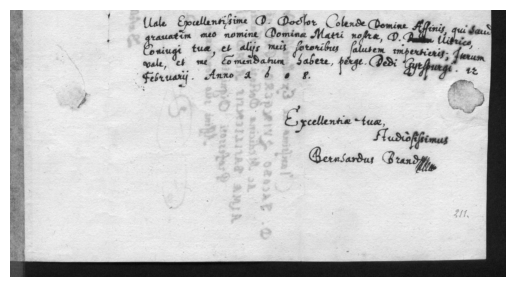

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("dataset/1.bmp",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap = "gray")
plt.axis("off")

In [10]:
import numpy as np
hist = np.zeros(256)
for pixel in img.flatten():
  hist[pixel]+=1
hist = hist/hist.sum()

omega = np.cumsum(hist)  # gives w0 at all values of t
mu = np.cumsum(hist*np.arange(256)) # gives cumulative sum of mu0 for calculation in next step
mu_total = mu[-1]

In [13]:
sigma_b_sq = np.zeros(256)
for t in range(256):
  if omega[t] == 0 or omega[t] == 1:
        continue
  mu0 = mu[t] / omega[t]
  mu1 = (mu_total - mu[t])/(1-omega[t])

  sigma_b_sq[t] = (omega[t]*(1-omega[t])*(mu0 - mu1)**2)

In [14]:
optimal_threshold = np.argmax(sigma_b_sq)
optimal_threshold

np.int64(129)

(np.float64(-0.5), np.float64(1503.5), np.float64(810.5), np.float64(-0.5))

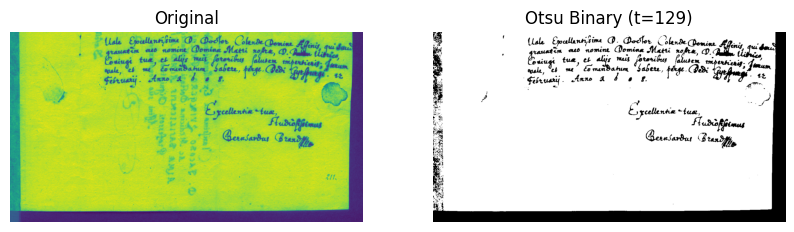

In [16]:
# apply the threshold found before
binary_img = np.zeros_like(img)
binary_img[img > optimal_threshold] = 255

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title(f"Otsu Binary (t={optimal_threshold})")
plt.imshow(binary_img, cmap="gray")
plt.axis("off")